# Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Data Collection & Processing

In [2]:
gold_data = pd.read_csv("gld_price_data.csv")

In [3]:
gold_data

,Date,SPX,USO,SLV,EUR/USD,GLD
0,01/02/2008,1447.160034,78.470001,15.1800,1.471692,84.860001
1,01/03/2008,1447.160034,78.370003,15.2850,1.474491,85.570000
2,01/04/2008,1411.630005,77.309998,15.1670,1.475492,85.129997
3,01/07/2008,1416.180054,75.500000,15.0530,1.468299,84.769997
4,01/08/2008,1390.189941,76.059998,15.5900,1.557099,86.779999
...,...,...,...,...,...,...
2285,05/08/2018,2671.919922,14.060000,15.5100,1.186789,124.589996
2286,05/09/2018,2697.790039,14.370000,15.5300,1.184722,124.330002
2287,05/10/2018,2723.070068,14.410000,15.7400,1.191753,125.180000
2288,5/14/2018,2730.129883,14.380000,15.5600,1.193118,124.489998


In [4]:
gold_data.columns

Index(['Date', 'SPX', 'USO', 'SLV', 'EUR/USD', 'GLD'], dtype='object')

In [5]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   USO      2290 non-null   float64
 3   SLV      2290 non-null   float64
 4   EUR/USD  2290 non-null   float64
 5   GLD      2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
gold_data.isnull().sum()

Date       0
SPX        0
USO        0
SLV        0
EUR/USD    0
GLD        0
dtype: int64

In [7]:
# statistical Measures of the dataset
gold_data.describe()

,SPX,USO,SLV,EUR/USD,GLD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,31.842221,20.084997,1.283653,122.732875
std,519.111540,19.523517,7.092566,0.131547,23.283346
min,676.530029,7.960000,8.850000,1.039047,70.000000
25%,1239.874969,14.380000,15.570000,1.171313,109.725000
50%,1551.434998,33.869999,17.268500,1.303297,120.580002
75%,2073.010070,37.827501,22.882500,1.369971,132.840004
max,2872.870117,117.480003,47.259998,1.598798,184.589996


In [8]:
#To check for duplicates
gold_data.duplicated().sum()

0

# Histogram distribution to check outliers


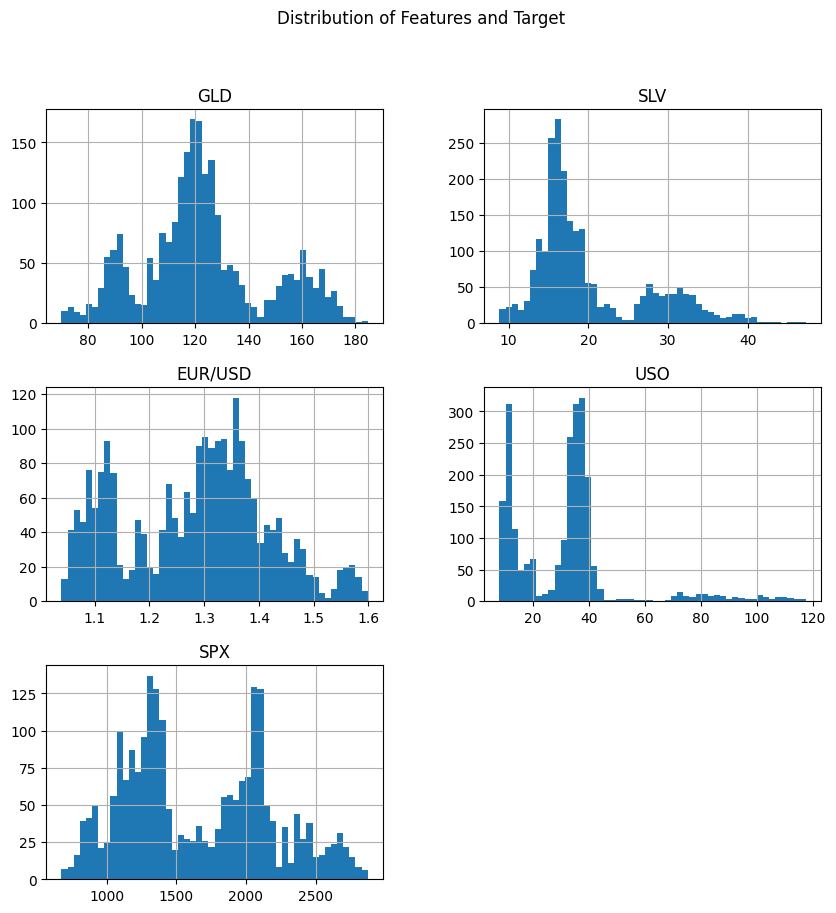

In [9]:
gold_data[['GLD', 'SLV', 'EUR/USD','USO','SPX']].hist(bins=50, figsize=(10, 10))
plt.suptitle('Distribution of Features and Target')
plt.show()

# Construct a heatmap to undestand the correlation


In [10]:
data=gold_data.drop('Date',axis =1)

correlation = data.corr()

<Axes: >

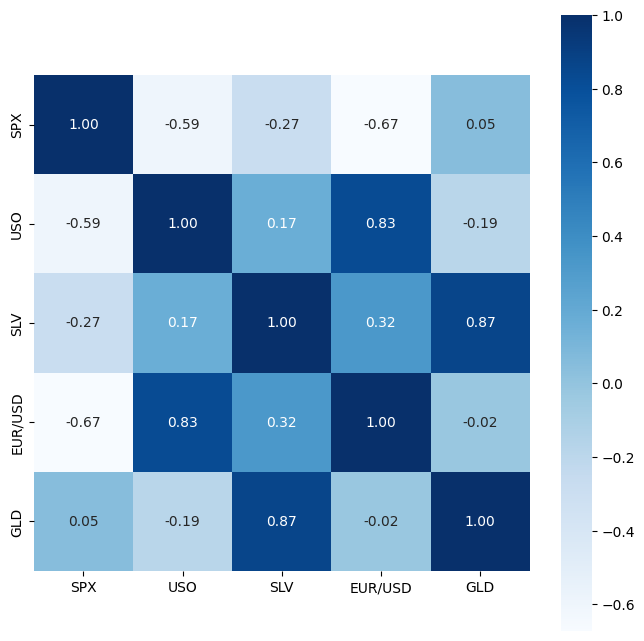

In [11]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f',annot=True, annot_kws={'size':10}, cmap='Blues')

In [12]:
print(correlation['GLD'])

SPX        0.049345
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
GLD        1.000000
Name: GLD, dtype: float64


# Splitting the data into a Training dataset & Testing dataset

In [13]:
# discard the gold and use the rest values as features
X = data.drop(['GLD'], axis=1)

# use the gold as the target
Y = data['GLD']

In [14]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [15]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

# 1. Linear Regression Model

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [17]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred_linear = linear_model.predict(X_test)
# Calculate R2 score
linear_r2 = r2_score(y_test, y_pred_linear)
print("Linear Regression R2:", linear_r2)

Linear Regression R2: 0.8687601348796201


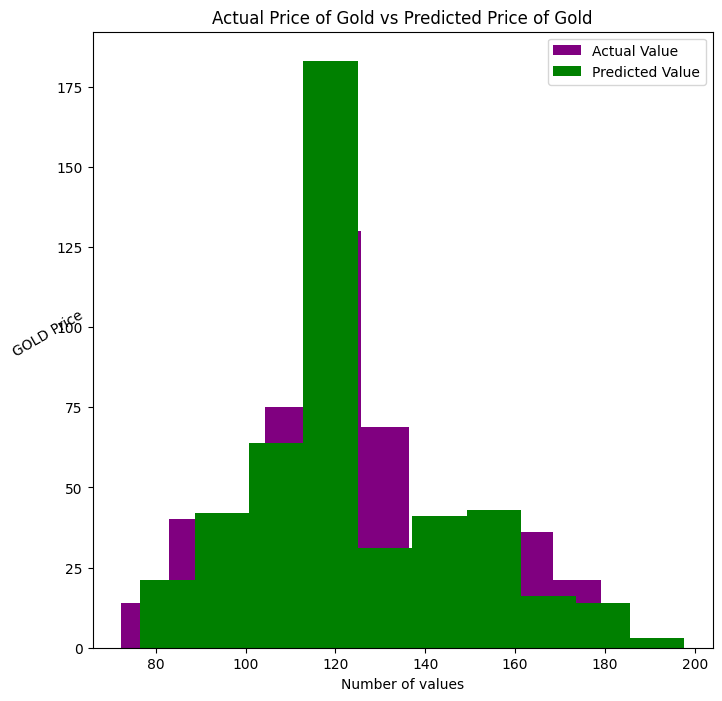

In [19]:
plt.figure(figsize = (8,8))
plt.hist(y_test, color='purple', label = 'Actual Value')
plt.hist(y_pred_linear, color='green', label='Predicted Value')
plt.title('Actual Price of Gold vs Predicted Price of Gold')
plt.xlabel('Number of values')
plt.ylabel('GOLD Price', rotation=30)
plt.legend()
plt.show()

# 2. Random Forest Regressor

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2)

In [21]:
regressor = RandomForestRegressor(n_estimators=100)

In [22]:
regressor

RandomForestRegressor()

In [23]:
# training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [24]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)
r2 = r2_score(Y_test, test_data_prediction)
print('Random Forest R2 :', r2)

Random Forest R2 : 0.9886020339374241


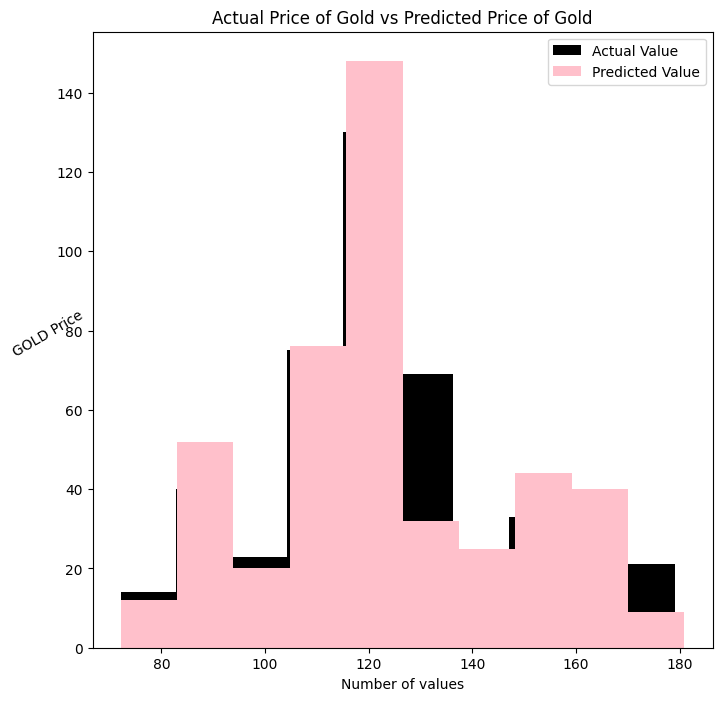

In [25]:
plt.figure(figsize = (8,8))
plt.hist(y_test, color='black', label = 'Actual Value')
plt.hist(test_data_prediction, color='pink', label='Predicted Value')
plt.title('Actual Price of Gold vs Predicted Price of Gold')
plt.xlabel('Number of values')
plt.ylabel('GOLD Price', rotation=30)
plt.legend()
plt.show()

# 3. Gradient Boosting Regressor Model


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


In [27]:
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100)
gradient_boosting_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [28]:
y_pred_gb = gradient_boosting_model.predict(X_test)
gb_r2 = r2_score(y_test, y_pred_gb)
print("Gradient Boosting R2:", gb_r2)


Gradient Boosting R2: 0.9781116243836354


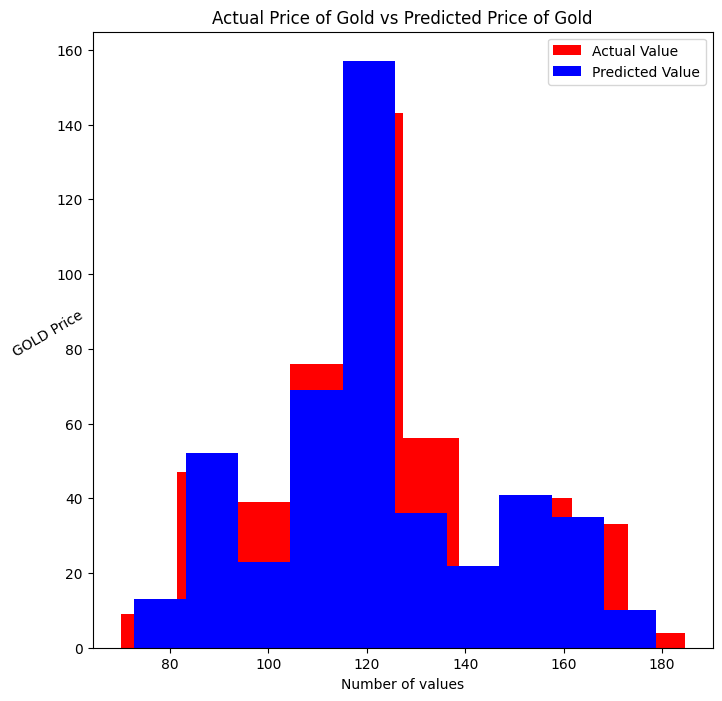

In [29]:
plt.figure(figsize = (8,8))
plt.hist(y_test, color='red', label = 'Actual Value')
plt.hist(y_pred_gb, color='blue', label='Predicted Value')
plt.title('Actual Price of Gold vs Predicted Price of Gold')
plt.xlabel('Number of values')
plt.ylabel('GOLD Price', rotation=30)
plt.legend()
plt.show()